# 1. Instalando as Bibliotecas

In [105]:
#!pip install pandas
#!pip install scikit-learn
#!pip install matplotlib
#!pip install seaborn
#!pip install plotly
#!pip install --upgrade pip
#!pip install missingno
#!pip install xgboost
#!pip install lightgbm
#!pip install catboost
#!pip install nbformat


# 2. Importando as Bibliotecas

In [106]:
# Manipulação de dados
import pandas as pd
import numpy as np
import os
import datetime
from collections import Counter
from itertools import combinations, permutations
from pandas.api.types import CategoricalDtype

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno  # visualização de valores faltantes
import plotly.io as pio

# Pré-processamento e engenharia de features
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression, RFE

# Divisão de dados e validação cruzada
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, KFold

# Modelos de regressão
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Métricas de avaliação
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, median_absolute_error, r2_score

# Estatística
import scipy.stats as stats

# Outros utilitários
import warnings
warnings.filterwarnings("ignore")


# =========================
# 3. Carregar o dataset
# =========================

In [107]:

df = pd.read_csv('data/dados_sensores.csv')  # substitua pelo caminho do seu arquivo
print("Dimensões do dataset:", df.shape)
print("Colunas:", df.columns)

Dimensões do dataset: (500, 13)
Colunas: Index(['id', 'timestamp', 'temperatura', 'vibracao', 'corrente', 'velocidade',
       'posicao', 'pressao', 'nivel', 'qualidade_ar', 'umidade', 'tensao',
       'fumaca'],
      dtype='object')


# =========================
# 4. Visualizar as primeiras linhas
# =========================

In [108]:
df.head()


,id,timestamp,temperatura,vibracao,corrente,velocidade,posicao,pressao,nivel,qualidade_ar,umidade,tensao,fumaca
0,1,2025-06-07T18:22:00.542865Z,25.3,0.0,1.5,120,45,101.3,75,80,60.0,220.0,0
1,2,2025-06-08T00:51:20.487094Z,38.1,4.5,7.0,1068,1,7.0,3,410,42.5,224.0,0
2,3,2025-06-08T00:51:32.000514Z,35.5,0.9,6.1,1165,0,7.8,18,304,37.7,213.2,0
3,4,2025-06-08T00:53:20.913343Z,35.0,2.8,3.2,1219,1,7.4,24,386,46.2,222.7,0
4,5,2025-06-08T00:53:41.701267Z,38.3,4.0,4.4,1443,0,4.6,98,202,45.3,212.7,0


In [109]:
df.tail()

,id,timestamp,temperatura,vibracao,corrente,velocidade,posicao,pressao,nivel,qualidade_ar,umidade,tensao,fumaca
495,41,2025-06-08T01:06:51.336876Z,37.5,0.6,4.1,1225,7,4.1,44,312,38.0,229.0,0
496,34,2025-06-08T00:57:22.595073Z,37.4,3.7,6.2,1499,4,27.1,20,331,49.6,212.4,0
497,44,2025-06-08T00:56:41.216888Z,39.9,2.0,7.8,1467,0,4.1,58,408,41.8,229.7,1
498,55,2025-06-08T01:09:10.959900Z,38.4,2.5,3.8,1381,5,7.9,70,180,57.3,210.1,1
499,37,2025-06-08T01:20:15.977655Z,37.7,4.3,7.8,1425,2,4.1,38,410,37.3,229.5,1


# =========================
# 5. Informações gerais do dataset
# =========================

In [110]:
df.info()        # tipos de dados e valores nulos



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            500 non-null    int64  
 1   timestamp     500 non-null    object 
 2   temperatura   500 non-null    float64
 3   vibracao      500 non-null    float64
 4   corrente      500 non-null    float64
 5   velocidade    500 non-null    int64  
 6   posicao       500 non-null    int64  
 7   pressao       500 non-null    float64
 8   nivel         500 non-null    int64  
 9   qualidade_ar  500 non-null    int64  
 10  umidade       500 non-null    float64
 11  tensao        500 non-null    float64
 12  fumaca        500 non-null    int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 50.9+ KB


In [111]:
df.describe()    # estatísticas descritivas para colunas numéricas

,id,temperatura,vibracao,corrente,velocidade,posicao,pressao,nivel,qualidade_ar,umidade,tensao,fumaca
count,500.00000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,40.70000,37.03080,2.445200,5.236000,1203.772000,3.316000,10.274800,45.03000,338.550000,44.950400,220.583800,0.406000
std,22.53223,1.79938,1.360345,1.477847,188.223016,3.946555,8.430019,27.78736,80.375468,8.619511,5.768444,0.491576
min,1.00000,25.30000,0.000000,1.500000,120.000000,0.000000,4.100000,2.00000,80.000000,30.100000,210.100000,0.000000
25%,24.00000,35.90000,1.400000,4.200000,1075.750000,0.000000,4.100000,23.00000,279.000000,37.975000,215.875000,0.000000
50%,40.00000,37.10000,2.400000,5.200000,1206.000000,2.000000,7.400000,43.00000,340.500000,44.900000,220.800000,0.000000
75%,57.00000,38.40000,3.600000,6.300000,1352.250000,5.000000,13.800000,65.25000,397.000000,51.825000,225.200000,1.000000
max,83.00000,39.90000,4.900000,7.800000,1499.000000,45.000000,101.300000,98.00000,480.000000,60.000000,229.700000,1.000000


# =========================
# 6. Verificar valores ausentes
# =========================

In [112]:
missing_count = df.isnull().sum()
print("Valores faltantes por coluna:\n", missing_count)

Valores faltantes por coluna:
 id              0
timestamp       0
temperatura     0
vibracao        0
corrente        0
velocidade      0
posicao         0
pressao         0
nivel           0
qualidade_ar    0
umidade         0
tensao          0
fumaca          0
dtype: int64


# =========================
# 7. Exploração de colunas categóricas
# =========================

In [113]:
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nColuna: {col}")
    print(df[col].value_counts())
    print("-"*40)


Coluna: timestamp
timestamp
2025-06-08T00:55:44.806202Z    11
2025-06-08T01:11:33.573607Z    11
2025-06-08T00:58:57.679291Z    11
2025-06-08T00:59:25.231058Z    10
2025-06-08T01:06:51.336876Z    10
                               ..
2025-06-08T01:10:03.337196Z     3
2025-06-08T01:09:32.593889Z     3
2025-06-08T01:10:12.970727Z     3
2025-06-08T01:20:48.340499Z     3
2025-06-08T01:08:29.374579Z     2
Name: count, Length: 83, dtype: int64
----------------------------------------


# =========================
# 8. Exploração de colunas numéricas
# =========================

In [114]:
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    print(f"\nColuna: {col}")
    print("Média:", df[col].mean())
    print("Mediana:", df[col].median())
    print("Desvio Padrão:", df[col].std())
    print("Mínimo:", df[col].min())
    print("Máximo:", df[col].max())
    print("-"*40)



Coluna: id
Média: 40.7
Mediana: 40.0
Desvio Padrão: 22.532230311391974
Mínimo: 1
Máximo: 83
----------------------------------------

Coluna: temperatura
Média: 37.03079999999999
Mediana: 37.1
Desvio Padrão: 1.799379585798276
Mínimo: 25.3
Máximo: 39.9
----------------------------------------

Coluna: vibracao
Média: 2.4452
Mediana: 2.4
Desvio Padrão: 1.360344822488822
Mínimo: 0.0
Máximo: 4.9
----------------------------------------

Coluna: corrente
Média: 5.236000000000001
Mediana: 5.2
Desvio Padrão: 1.4778471044489876
Mínimo: 1.5
Máximo: 7.8
----------------------------------------

Coluna: velocidade
Média: 1203.772
Mediana: 1206.0
Desvio Padrão: 188.2230161899636
Mínimo: 120
Máximo: 1499
----------------------------------------

Coluna: posicao
Média: 3.316
Mediana: 2.0
Desvio Padrão: 3.9465547746329785
Mínimo: 0
Máximo: 45
----------------------------------------

Coluna: pressao
Média: 10.2748
Mediana: 7.4
Desvio Padrão: 8.430018706431296
Mínimo: 4.1
Máximo: 101.3
--------------

# =========================
# 9. Estatísticas avançadas
# =========================

In [115]:
# Contagem de combinações de valores (usando itertools e Counter)
if len(categorical_cols) >= 2:
    for col1, col2 in combinations(categorical_cols, 2):
        print(f"\nContagem de combinações entre {col1} e {col2}:")
        print(Counter(zip(df[col1], df[col2])))

# =========================
# 10. Manipulação de datas
# =========================

In [116]:
date_cols = df.select_dtypes(include='datetime64[ns]').columns
for col in date_cols:
    df[col+'_ano'] = df[col].dt.year
    df[col+'_mes'] = df[col].dt.month
    df[col+'_dia'] = df[col].dt.day

# =========================
# 11. Criando categorias personalizadas
# =========================

In [117]:
# Exemplo: transformar idade em faixas etárias
if 'idade' in df.columns:
    bins = [0, 18, 35, 50, 65, 100]
    labels = ['0-18', '19-35', '36-50', '51-65', '66+']
    df['faixa_etaria'] = pd.cut(df['idade'], bins=bins, labels=labels)

# =========================
# 12. Exportar dataset tratado (opcional)
# =========================

In [118]:
df.to_csv('data/dataset_tratado.csv', index=False)
print("Dataset tratado exportado com sucesso!")

Dataset tratado exportado com sucesso!


# =========================
# 13. Converter timestamp
# =========================

In [119]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

# =========================
# 14. Informações gerais
# =========================

In [120]:
print("\n📊 Informações do dataset:")
print(df.info())
print("\n📈 Estatísticas descritivas:")
print(df.describe())


📊 Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   id            500 non-null    int64              
 1   timestamp     500 non-null    datetime64[ns, UTC]
 2   temperatura   500 non-null    float64            
 3   vibracao      500 non-null    float64            
 4   corrente      500 non-null    float64            
 5   velocidade    500 non-null    int64              
 6   posicao       500 non-null    int64              
 7   pressao       500 non-null    float64            
 8   nivel         500 non-null    int64              
 9   qualidade_ar  500 non-null    int64              
 10  umidade       500 non-null    float64            
 11  tensao        500 non-null    float64            
 12  fumaca        500 non-null    int64              
dtypes: datetime64[ns, UTC](1), float64(6),

# =========================
# 15. Visualização de valores faltantes
# =========================


 Visualizando valores faltantes...


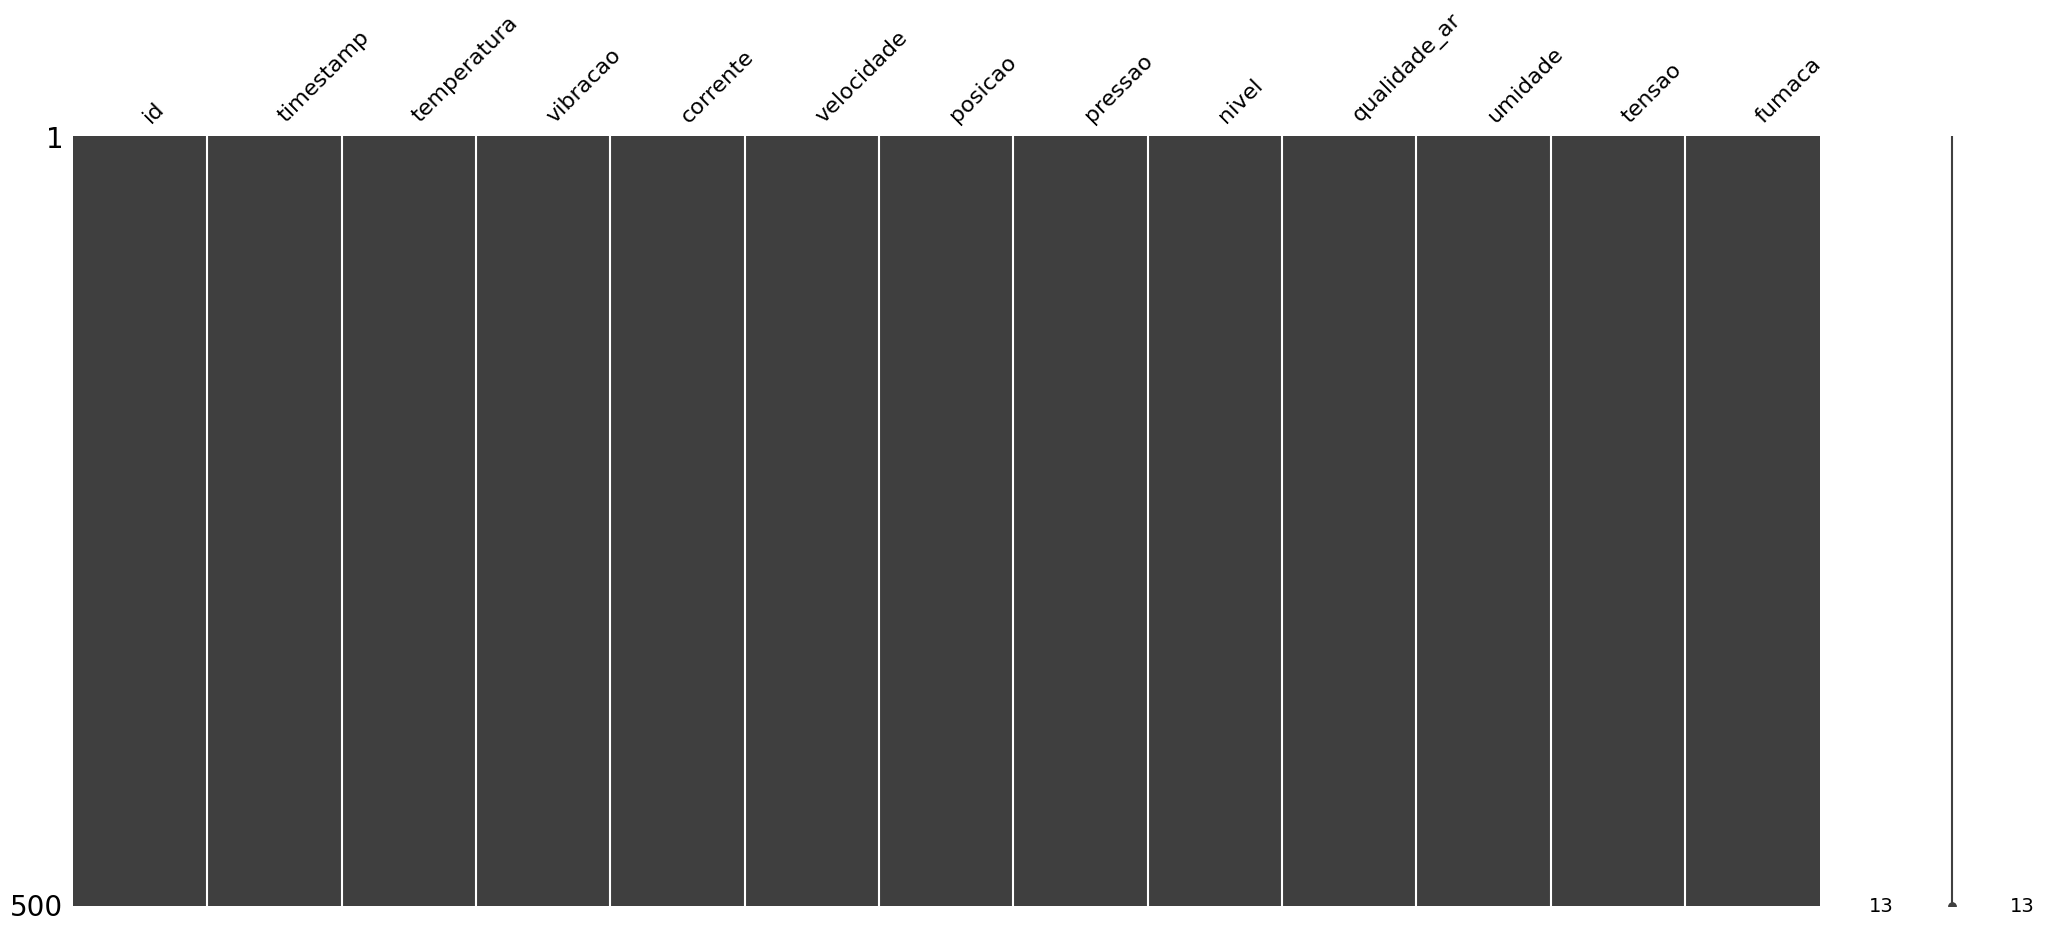

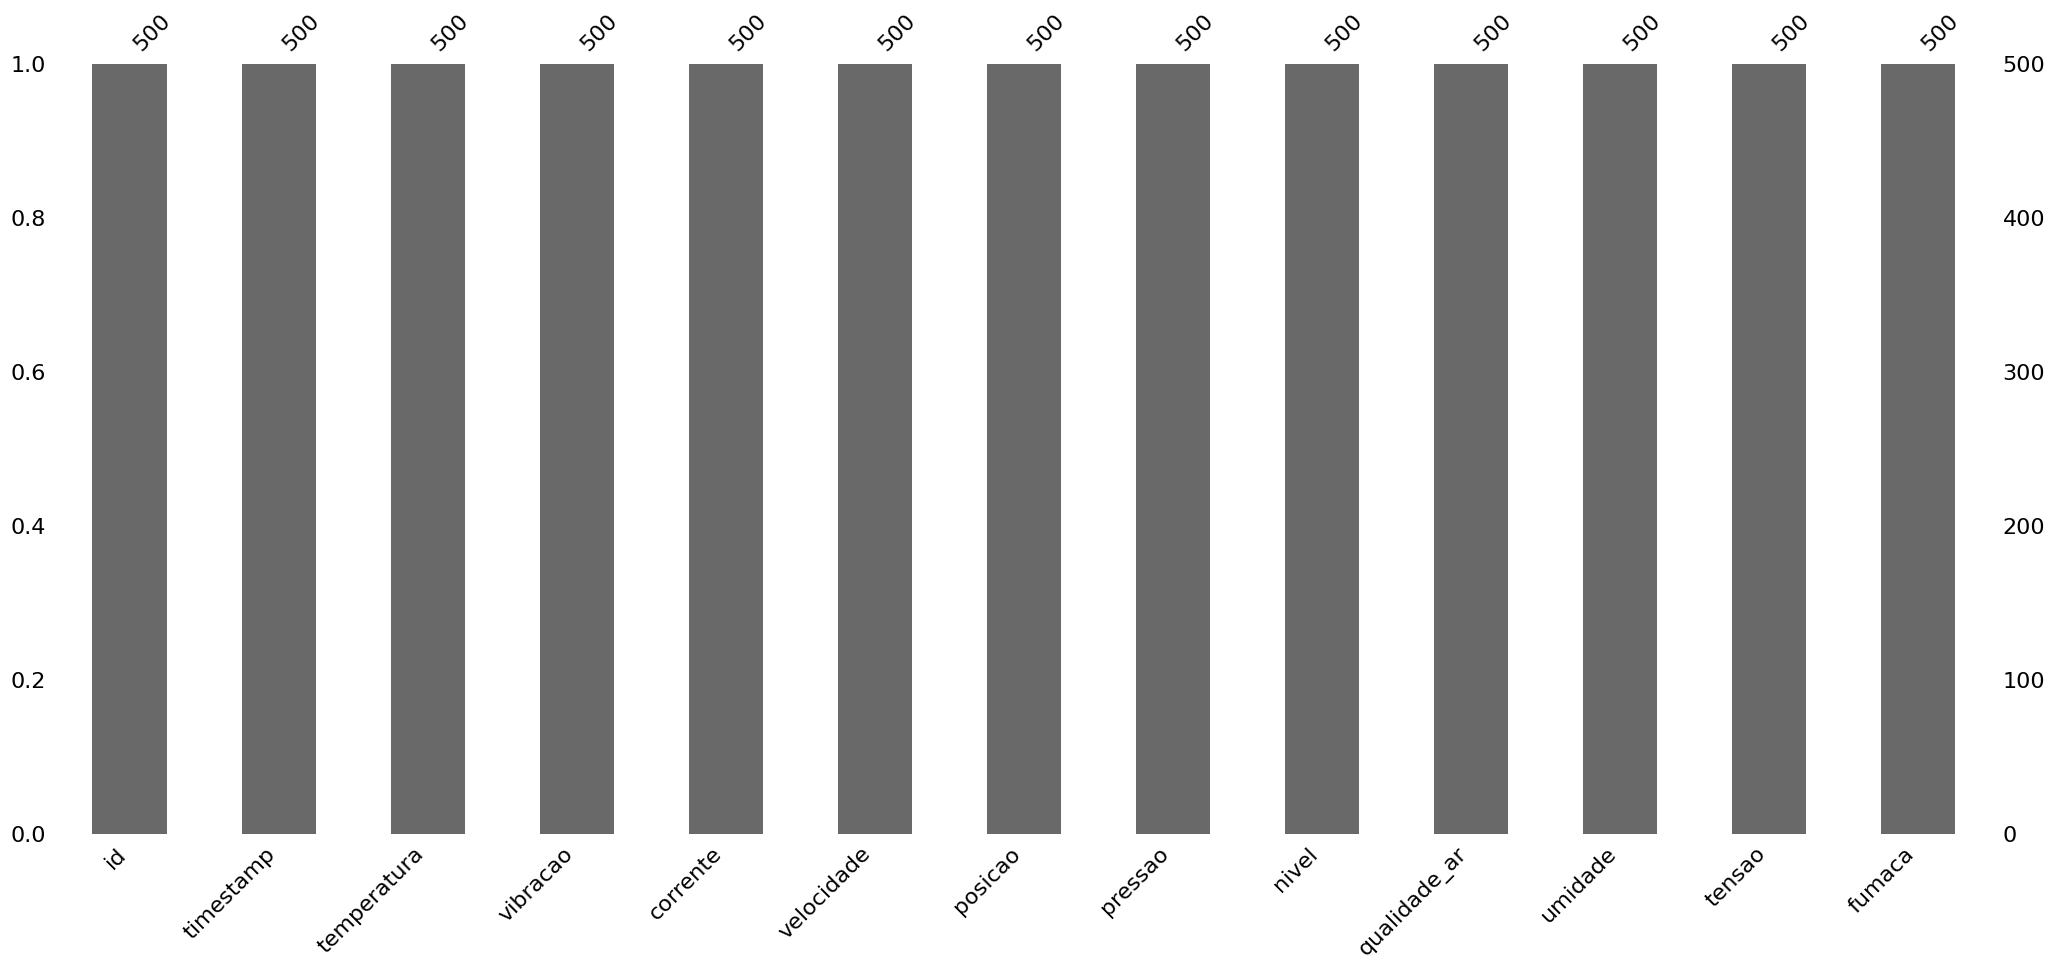

In [121]:
print("\n Visualizando valores faltantes...")
msno.matrix(df)
plt.show()

msno.bar(df)
plt.show()

# =========================
# 16. Distribuição de variáveis numéricas
# =========================

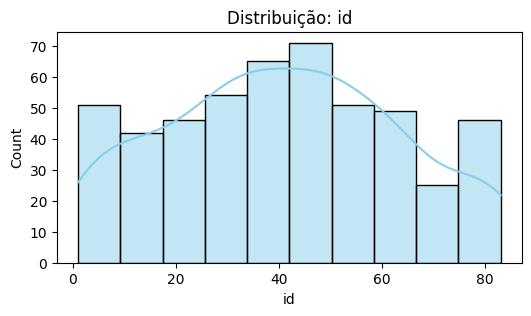

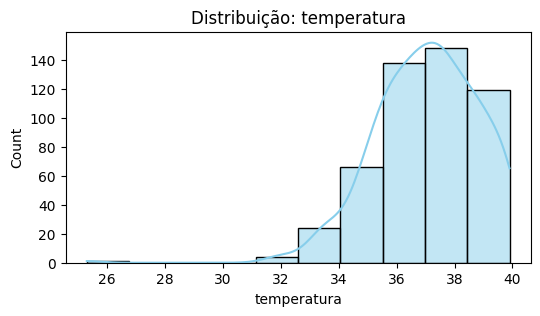

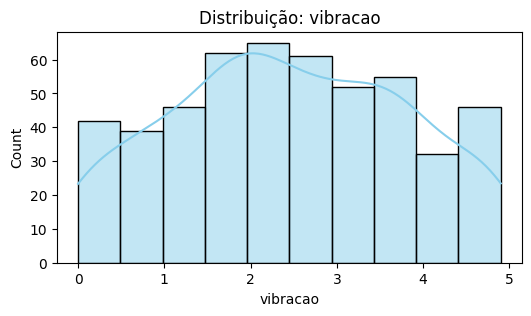

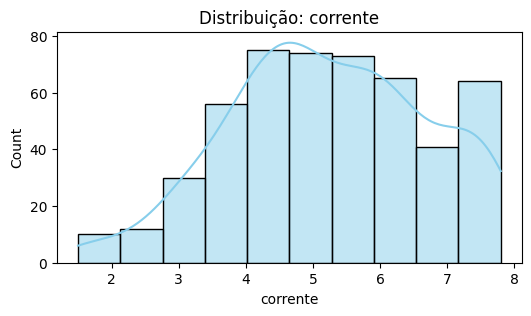

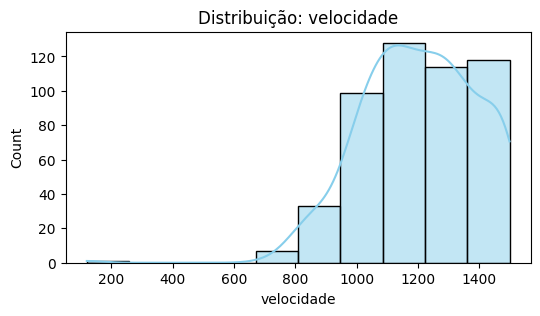

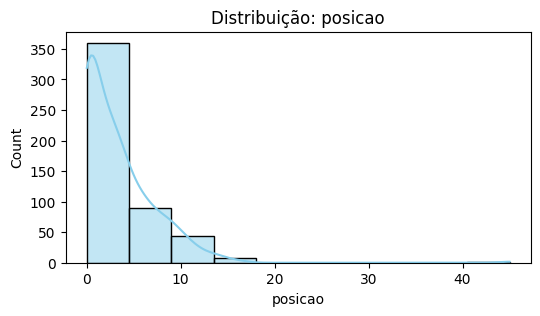

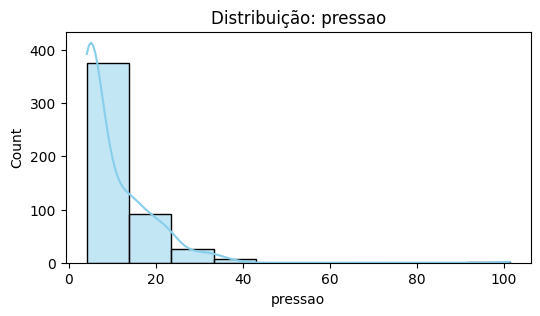

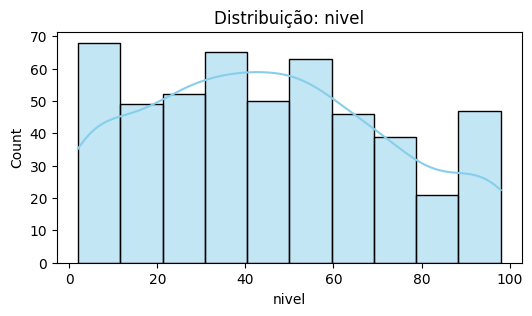

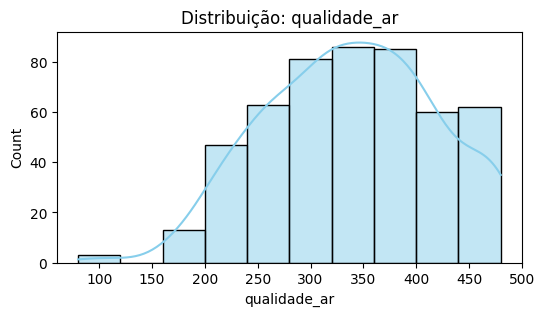

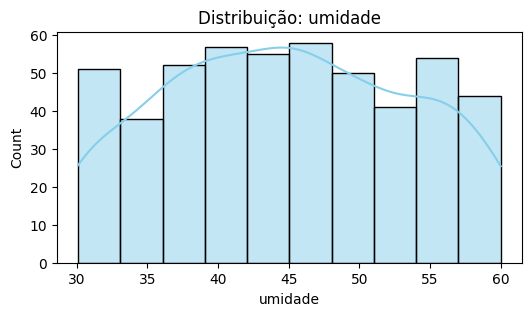

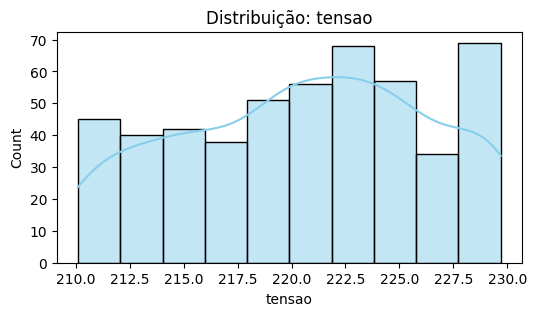

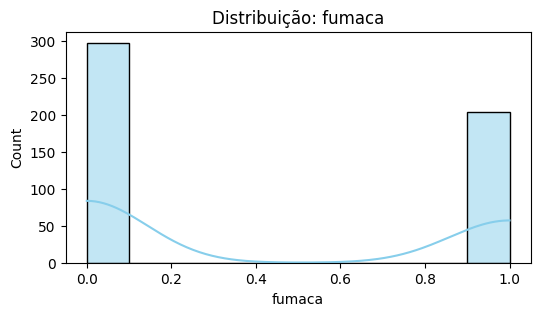

In [122]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

for col in numerical_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True, color='skyblue', bins=10)
    plt.title(f'Distribuição: {col}')
    plt.show()


# =========================
# 17. Boxplots para outliers
# =========================

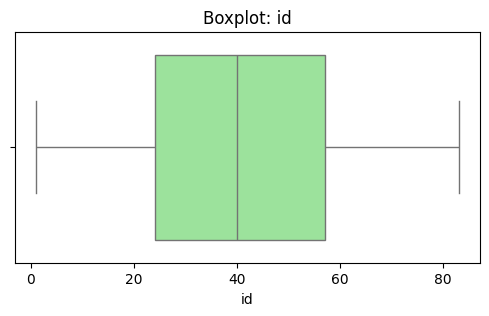

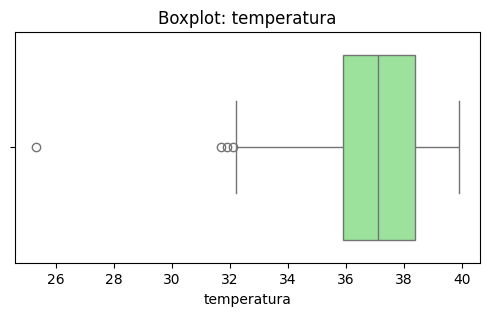

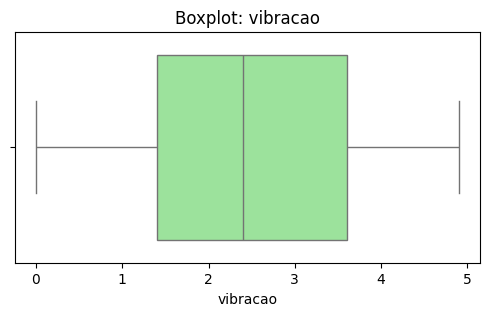

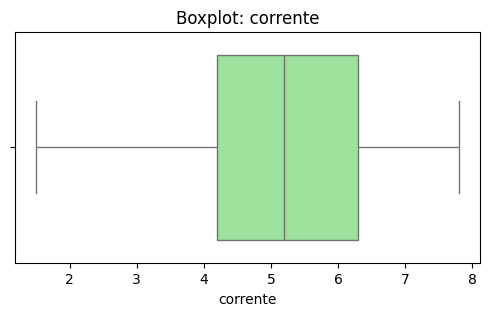

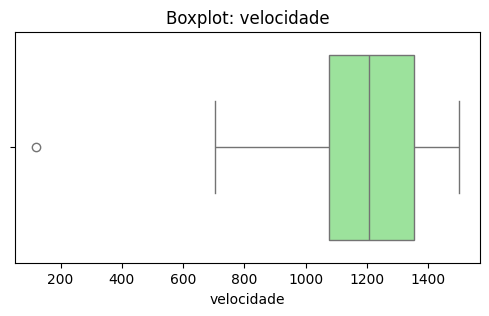

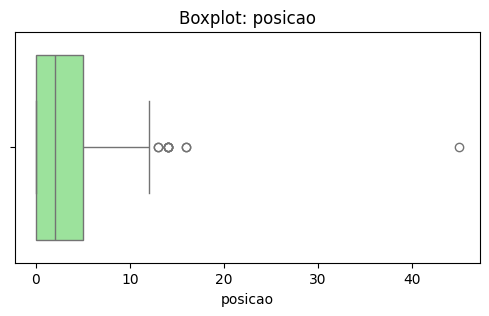

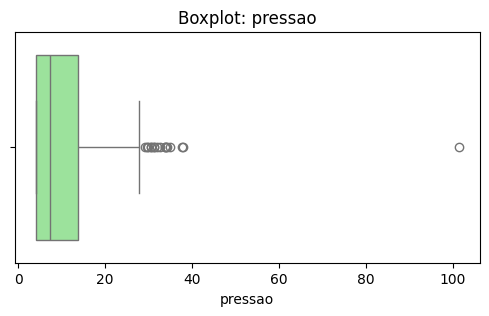

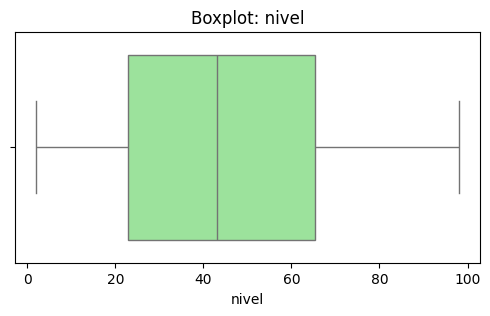

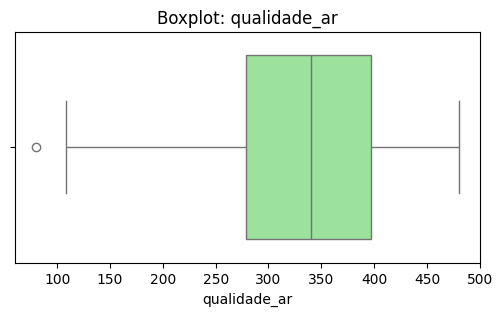

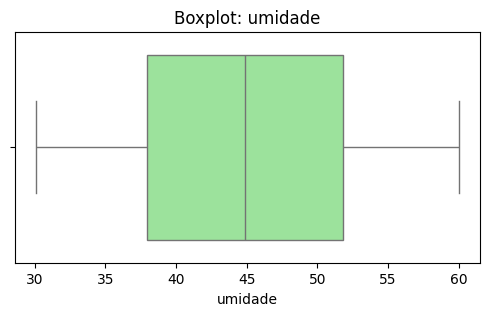

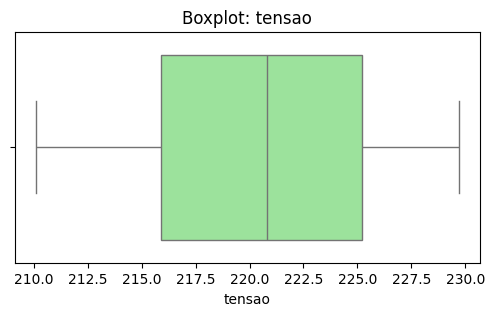

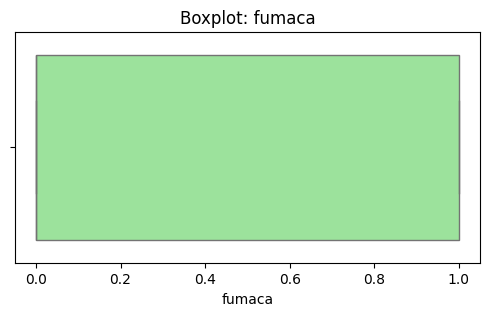

In [123]:
for col in numerical_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot: {col}')
    plt.show()

# =========================
# 18. Correlação entre variáveis numéricas
# =========================

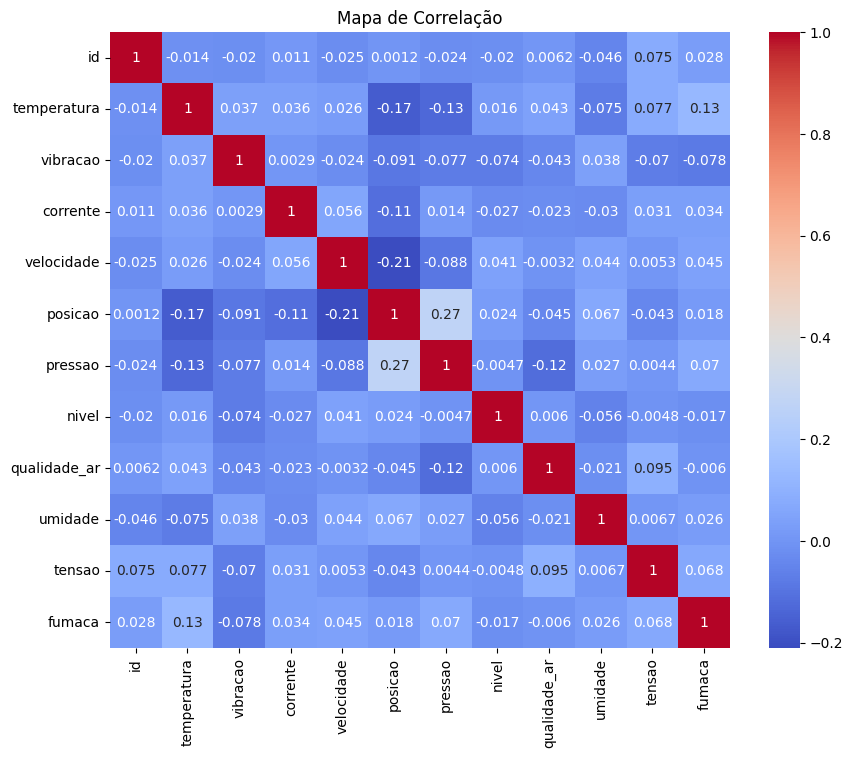

In [124]:
plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Correlação')
plt.show()


# =========================
# 19. Gráficos interativos com Plotly
# =========================

In [125]:
# Scatter temperatura x vibração
fig = px.scatter(df, x='temperatura', y='vibracao', color='fumaca',
                 size='corrente', hover_data=['id'], 
                 title='Temperatura x Vibração')
fig.show()

# Linha do tempo da temperatura
fig = px.line(df, x='timestamp', y='temperatura', 
              title='Temperatura ao longo do tempo')
fig.show()


# =========================
# 20. Remover colunas inúteis
# =========================

In [126]:
df_prep = df.drop(columns=['id', 'timestamp'])

# =========================
# 21. Separar numéricas e categóricas
# =========================

In [127]:
num_cols = df_prep.select_dtypes(include=np.number).columns.tolist()
cat_cols = df_prep.select_dtypes(include='object').columns.tolist()

print("Numéricas:", num_cols)
print("Categóricas:", cat_cols)

Numéricas: ['temperatura', 'vibracao', 'corrente', 'velocidade', 'posicao', 'pressao', 'nivel', 'qualidade_ar', 'umidade', 'tensao', 'fumaca']
Categóricas: []


# =========================
# 22. Tratamento de valores ausentes
# =========================

In [128]:
# Numéricas → mediana
imputer_num = SimpleImputer(strategy='median')
df_prep[num_cols] = imputer_num.fit_transform(df_prep[num_cols])

# Categóricas → valor mais frequente
if cat_cols:
    imputer_cat = SimpleImputer(strategy='most_frequent')
    df_prep[cat_cols] = imputer_cat.fit_transform(df_prep[cat_cols])

# =========================
# 23. Escalonamento das variáveis numéricas
# =========================

In [129]:
scaler = StandardScaler()   # pode trocar por MinMaxScaler() ou RobustScaler()
df_prep[num_cols] = scaler.fit_transform(df_prep[num_cols])

# =========================
# 24. Codificação de variáveis categóricas
# =========================

In [130]:
# LabelEncoder para variáveis simples
for col in cat_cols:
    if df_prep[col].nunique() <= 5:
        df_prep[col] = LabelEncoder().fit_transform(df_prep[col])

# OneHotEncoder para variáveis com muitas categorias
if cat_cols:
    encoder = OneHotEncoder(drop='first', sparse=False)
    encoded = encoder.fit_transform(df_prep[cat_cols])
    encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(cat_cols))
    df_prep = pd.concat([df_prep.drop(columns=cat_cols), encoded_df], axis=1)

# =========================
# 25. Criação de features polinomiais
# =========================

In [131]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df_prep[num_cols])
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(num_cols))

# Substituir numéricas originais pelas expandidas
df_poly = pd.concat([df_prep.drop(columns=num_cols), poly_df], axis=1)

# =========================
# 26. Seleção de variáveis
# =========================

In [133]:
# Supondo que "temperatura" é a variável alvo
X = df_poly.drop(columns=['temperatura'])
y = df_poly['temperatura']

# Seleção univariada com SelectKBest
selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("\n🔎 Melhores features (SelectKBest):", selected_features)

# Seleção com RFE (Recursive Feature Elimination)
from sklearn.linear_model import LinearRegression
rfe = RFE(LinearRegression(), n_features_to_select=5)
rfe.fit(X, y)
print("🔎 Features selecionadas pelo RFE:", X.columns[rfe.support_])


🔎 Melhores features (SelectKBest): Index(['temperatura^2', 'temperatura posicao', 'temperatura pressao',
       'posicao^2', 'posicao pressao'],
      dtype='object')
🔎 Features selecionadas pelo RFE: Index(['fumaca', 'temperatura^2', 'temperatura nivel', 'corrente tensao',
       'qualidade_ar tensao'],
      dtype='object')


# =========================
# 27. Produção da tabela final para normalização
# =========================

In [135]:
print("\nShape final:", df_poly.shape)
df_poly.head()


Shape final: (500, 77)


,temperatura,vibracao,corrente,velocidade,posicao,pressao,nivel,qualidade_ar,umidade,tensao,...,qualidade_ar^2,qualidade_ar umidade,qualidade_ar tensao,qualidade_ar fumaca,umidade^2,umidade tensao,umidade fumaca,tensao^2,tensao fumaca,fumaca^2
0,-6.525887,-1.799286,-2.530534,-5.763681,10.572702,10.808560,1.079628,-3.219999,1.747741,-0.101307,...,10.368394,-5.627724,0.326209,2.662107,3.054598,-0.177059,-1.444930,0.010263,0.083755,0.683502
1,0.594800,1.512012,1.194824,-0.722058,-0.587429,-0.388858,-1.514073,0.889843,-0.284570,0.592815,...,0.791821,-0.253223,0.527513,-0.735670,0.080980,-0.168697,0.235266,0.351430,-0.490105,0.683502
2,-0.851590,-1.137026,0.585220,-0.206196,-0.841068,-0.293864,-0.973719,-0.430288,-0.842004,-1.281315,...,0.185148,0.362304,0.551335,0.355737,0.708970,1.078872,0.696120,1.641769,1.059317,0.683502
3,-1.129742,0.261077,-1.379059,0.080985,-0.587429,-0.341361,-0.757577,0.590945,0.145119,0.367225,...,0.349217,0.085757,0.217010,-0.488559,0.021059,0.053291,-0.119976,0.134855,-0.303601,0.683502
4,0.706061,1.144090,-0.566254,1.272255,-0.841068,-0.673840,1.908172,-1.700603,0.040600,-1.368080,...,2.892050,-0.069044,2.326562,1.405959,0.001648,-0.055544,-0.033566,1.871644,1.131049,0.683502


# =========================
# 28. Separar variáveis (X) e alvo (y)
# =========================

In [136]:
X = df_poly.drop(columns=['temperatura'])
y = df_poly['temperatura']
print("Shape de X:", X.shape)
print("Shape de y:", y.shape)

Shape de X: (500, 76)
Shape de y: (500,)


# =========================
# 29. Divisão treino/teste
# =========================

In [137]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Shape treino:", X_train.shape)
print("Shape teste:", X_test.shape)

Shape treino: (400, 76)
Shape teste: (100, 76)


# =========================
# 30. Definição dos modelos
# =========================

In [62]:
modelos = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR(),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0),
    "LightGBM": LGBMRegressor(random_state=42),
    "CatBoost": CatBoostRegressor(verbose=0, random_state=42)
}

# =========================
# 31. Função de avaliação com validação cruzada
# =========================

In [138]:
def avaliar_modelo_cv(nome, modelo, X, y, cv=5):
    kfold = KFold(n_splits=cv, shuffle=True, random_state=42)
    scores = cross_val_score(modelo, X, y, cv=kfold, scoring="r2")
    return np.mean(scores)

# =========================
# 31. Treinar, validar e comparar
# =========================

In [139]:
resultados = []

for nome, modelo in modelos.items():
    # Treino normal
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    # Métricas no conjunto de teste
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Cross Validation
    r2_cv = avaliar_modelo_cv(nome, modelo, X, y, cv=5)

    resultados.append({
        "Modelo": nome,
        "MAE": mae,
        "RMSE": rmse,
        "R² Teste": r2,
        "R² CV (médio)": r2_cv
    })


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000450 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8276
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 76
[LightGBM] [Info] Start training from score 0.000250
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

# =========================
# 32. Comparar resultados em tabela
# =========================

In [140]:
df_resultados = pd.DataFrame(resultados).sort_values(by="R² Teste", ascending=False)
df_resultados

,Modelo,MAE,RMSE,R² Teste,R² CV (médio)
9,XGBoost,0.096191,0.380406,0.877665,0.956454
5,GradientBoosting,0.170563,0.384614,0.874943,0.944765
4,RandomForest,0.102510,0.409766,0.858053,0.932305
3,DecisionTree,0.094015,0.426544,0.846190,0.877998
10,LightGBM,0.112411,0.443882,0.833432,0.931433
11,CatBoost,0.153713,0.534933,0.758090,0.928949
6,AdaBoost,0.546701,0.725374,0.555185,0.571110
7,KNN,0.540393,0.814115,0.439692,0.397595
8,SVR,0.559151,0.927888,0.272141,0.120149
2,Lasso,0.761276,0.953575,0.231284,-0.101156


# =========================
# 33. Preparar dados
# =========================
# Supondo que df_poly é o dataset já pré-processado
# Remover coluna alvo do X

In [142]:
X = df_poly.drop(columns=['temperatura'])
y = df_poly['temperatura']

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# =========================
# 34 Criar e treinar modelo
# =========================

In [143]:
modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# =========================
# 35. Avaliação no teste
# =========================

In [144]:
y_pred = modelo.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("📊 Avaliação do modelo (Random Forest)")
print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")

📊 Avaliação do modelo (Random Forest)
MAE:  0.1025
RMSE: 0.4098
R²:   0.8581


# =========================
# 36. Predição de novos dados
# =========================
# Exemplo: pegar uma nova linha do conjunto de teste

In [145]:
novo_dado = X_test.iloc[[0]]
predicao = modelo.predict(novo_dado)

print("\n📌 Novo dado de entrada:")
print(novo_dado)
print("📌 Predição de temperatura:", predicao[0])


📌 Novo dado de entrada:
     vibracao  corrente  velocidade   posicao   pressao     nivel  \
361  0.996921 -0.498521   -0.743331  0.173489  0.964807 -0.073128   

     qualidade_ar   umidade    tensao    fumaca  ...  qualidade_ar^2  \
361     -1.663241 -0.481994  0.870464 -0.826742  ...         2.76637   

     qualidade_ar umidade  qualidade_ar tensao  qualidade_ar fumaca  \
361              0.801673            -1.447791              1.37507   

     umidade^2  umidade tensao  umidade fumaca  tensao^2  tensao fumaca  \
361   0.232319       -0.419559        0.398485  0.757708      -0.719649   

     fumaca^2  
361  0.683502  

[1 rows x 76 columns]
📌 Predição de temperatura: -1.1353045696606872


# =========================
# 36. Pré-processamento mínimo
# =========================
# Remover colunas que não ajudam no modelo

In [146]:
# Remover colunas que não ajudam no modelo
df_model = df.drop(columns=['id','timestamp'])

# Separar X e y
X = df_model.drop(columns=['temperatura'])
y = df_model['temperatura']

# Tratar valores ausentes
imputer_num = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer_num.fit_transform(X), columns=X.columns)

# Codificação de colunas categóricas (caso existam)
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# =========================
# 37. Divisão treino/teste
# =========================

In [147]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# =========================
# 38. Treinar modelo Random Forest
# =========================

In [148]:
modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# =========================
# 39. Avaliação do modelo
# =========================

In [149]:
y_pred = modelo.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # cálculo compatível com todas as versões
print("📊 Avaliação do modelo")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", rmse)
print("R²:", r2_score(y_test, y_pred))

📊 Avaliação do modelo
MAE: 1.38513
RMSE: 1.9441793924429913
R²: 0.011099585349920504


# =========================
# 40. Fazer predição com novos dados
# =========================

In [150]:
novo_dado = pd.DataFrame([{
    'vibracao': 80.0,
    'corrente': 10.0,
    'velocidade': 50000,
    'posicao': 5,
    'pressao': 7.5,
    'nivel': 50,
    'qualidade_ar': 300,
    'umidade': 80.0,
    'tensao': 2500.0,
    'fumaca': 0
}])

predicao = modelo.predict(novo_dado)
# Criar DataFrame
df_novo = pd.DataFrame(novo_dado)
df_novo


,vibracao,corrente,velocidade,posicao,pressao,nivel,qualidade_ar,umidade,tensao,fumaca
0,80.0,10.0,50000,5,7.5,50,300,80.0,2500.0,0


In [151]:
print("📌 Predição de temperatura:", predicao[0])

📌 Predição de temperatura: 36.91600000000001
